In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [5]:
college = pd.DataFrame()
college['gpa'] = [3.4, 4.0, 2.3, 4.0, 3.1, 3.2, 3.9, 3.6, 3.7, 3.10, 3.12, 3.99, 4.0, 2.7, 2.8, 2.19, 3.4, 4.0, 2.3, 4.0, 3.1, 3.2, 3.9, 3.6, 3.7, 3.10, 3.12, 3.99, 4.0, 2.7]
college['GRE'] = [180, 340, 243, 236, 222, 209, 329, 322, 310, 224, 
                     320, 310, 317, 351, 237, 213, 319, 312, 321, 222,
                     216, 218, 224, 223, 234, 219, 214, 211, 237, 242]


college['admission'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]

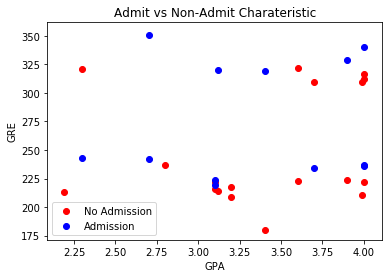

In [8]:
plt.scatter(
    college[college['admission'] == 1].gpa,
    college[college['admission'] == 1].GRE,
    color='red'
)
plt.scatter(
    college[college['admission'] == 0].gpa,
    college[college['admission'] == 0].GRE,
    color='blue'
)
plt.legend(['No Admission', 'Admission'])
plt.title('Admit vs Non-Admit Charateristic')
plt.xlabel('GPA')
plt.ylabel('GRE')
plt.show()

In [11]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = college[['gpa', 'GRE']]
Y = college.admission
neighbors.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [13]:
#Predicting for candidate with 3.4 GPA and 300 GRE Score
neighbors.predict([[3.4, 300]])

array([1])

In [26]:
neighbors = KNeighborsClassifier(n_neighbors = 5)
X = college[['gpa', 'GRE']]
Y = college.admission
neighbors.fit(X,Y)
## Predicting for candidate w/ 3.4 GPA and 300 GRE
print(neighbors.predict([[3.4,300]]))
print(neighbors.predict_proba([[3.4,300]]))

[1]
[[0.2 0.8]]


In [31]:
# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

In [32]:
h = 2

In [33]:
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])



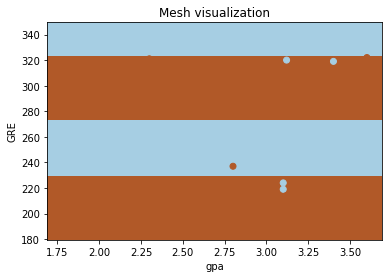

In [35]:
# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('gpa')
plt.ylabel('GRE')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

## Fell within the Blue Area == Yes Admit and Fell Within Brown Area == No Admit 